## Week 3 Day 3 Afternoon - Graphs

In [7]:
%run "boaz_utils.ipynb"

# Graphs

Often in computation we have __data__ from the world, and a __question__ we want to answer about these data.

To do so, we need to find a __model__ for the data, and a way to translate our question into a __mathematical question about the model__

1) Have map of Kingston, want to find fastest way to get from Rex Nettleford to Jamaica College.<br>
2) Instagram is trying to figure out how many followers of followers the average Jamaican has. <br>
3) Geneticist is trying to find which genes relate to a certain colon cancer.

![title](jamaica_map.png)

What is perhaps most surprising is that these and any many other questions, all use the same mathematical model of a __graph__ 

A __graph__ is just a way to store __connections__ between pairs of entities:

The graph of Kingston's roads could be composed of all street intersections, with a connection between intersection $u$ and intersection $v$ if they are directly connected by a road.

The Instagram graph is composed of all Instagram users, with a connection from user $u$ to user $v$ if $u$ follows $v$.

The gene-symptom interaction graph is composed of all genes and all "symptoms" (also known as phenotypes: some observable differences in people), where gene $u$ is connected to symptom $v$ if there is a correlation between people having the gene $u$ and symptom $v$. 

Mathematically, a graph is a set $V$ of __vertices__ and a set $E$ of pairs of these vertices which is known as the set of __edges__. We say that a vertex $u\in V$ is connected to $v\in V$ if the pair $(u,v)$ is in $E$.

A graph where $(u,v)$ is an edge if and only if $(v,u)$ is also an edge is known as an __undirected__ graph. Undirected graphs form an important special case. Otherwise if this is not promised to be the case, we say the graph is __directed__.

Sometimes the edges (or vertices) of the graph are labeled by a number, which we call a __weight__. For example in the case of the road network, we might label every road segment with the length of that segment in kilometers.

There are two main representations for graphs. We can always assume the vertices are simply identified by the numbers $0$ to $n-1$ for some $n$. 

The __adjacency list representation__ is an array $L$ where $L[i]$ is the list of all neighbors of the vertex $i$ (i.e., all $j$ such that $(i,j)\in E$)

The __adjacency matrix representation__ is an $n\times n$ two-dimensional array $M$ (i.e., matrix) such that $M[i][j]$ equals $1$ if $j$ is a neighbor of $i$ and equals $0$ otherwise.

### Questions

* If a graph has $n$ vertices and $m$ edges - how big is its adjacency list representation? how big  is its adjacency matrix representation?

* Given a graph $G$ on $n$ vertices and two vertices $i,j$, how long can it take us (in the worst case) to find out if $j$ is a neighbor of $i$ when $G$ is represented in the adjacency list form? How long will it take in the adjacency matrix form?

### Examples:

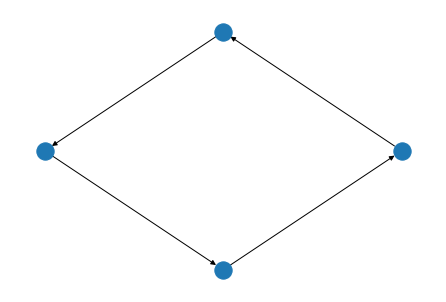

In [10]:
G = [[1],[2],[3],[0]]
draw_graph(G)

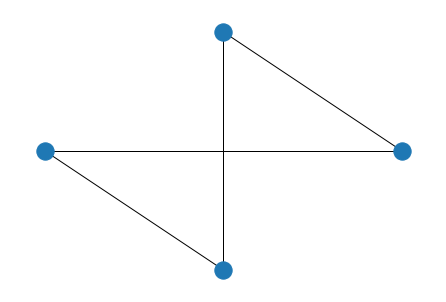

In [11]:
G = [[3,1],[0,2],[1,3],[2,0]]
draw_graph(G)

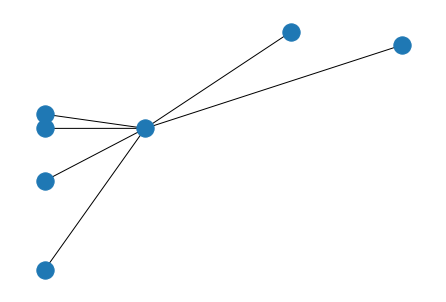

In [12]:
G = [[1,2,3,4,5,6],[0],[0],[0],[0],[0],[0]]
draw_graph(G)

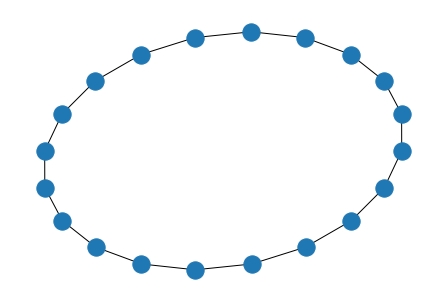

In [13]:
n = 20
cycle = [ [(i+1) % n, (i-1) % n] for i in range(n) ]
draw_graph(cycle)

In [14]:
def grid_neighbors(i,j,n):
    if i==n-1 and j== n-1: return []
    if i==n-1:
        return [i*n+j+1]
    if j==n-1:
        return [(i+1)*n+j]
    return [n*i+((j+1) % n), n*((i+1) % n)+j] 

In [15]:
n = 5
grid = [ grid_neighbors(i,j,n) for i in range(n) for j in range(n)  ]

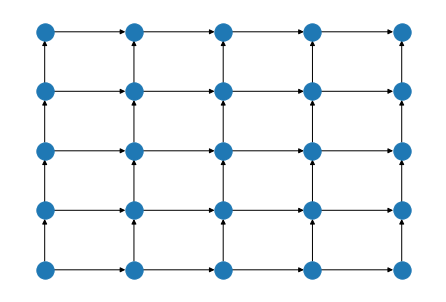

In [16]:
draw_graph(grid,'grid_layout')

# Basic graph functions

In [26]:
def neighbors(G,u):
    return G[u]

def isedge(G,u,v):
    for i in G[u]:
        if i == v:
            return True
    return False

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j):
    if not isedge(G, i, j):
        G[i].append(j)
        
def emptygraph(n):
    G = []
    for i in range(n):
        G.append([])
    return G

In [27]:
neighbors(cycle,0)

[1, 19]

In [28]:
isedge(cycle,4,7)

False

In [29]:
vertices(cycle)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [30]:
def zeros(n): return [0 for i in range(n)]
def printmatrix(M):
    for L in M:
        print(L)
        
def list2matrix(G):
    n = len(vertices(G))
    M = [zeros(n) for i in range(n)]
    for i in range(n):
        for j in range(n):
            if isedge(G,i,j):
                M[i][j] = 1
            else:
                M[i][j] = 0
    return M

__Question:__ Write function `list2matrix(G)` that convertes a graph `G` in adj list format to adj matrix format where `M[i][j]` equals `1`/`0` based on whether `i` is neighbor of `j`

In [31]:
G = [[3,1],[0,2],[1,3],[2,0]]
M = list2matrix(G)
printmatrix(M)

[0, 1, 0, 1]
[1, 0, 1, 0]
[0, 1, 0, 1]
[1, 0, 1, 0]


In [32]:
def list2matrix(G):
    n = len(vertices(G))
    M = [[0 for i in range(n)] for j in range(n)]
    for i in vertices(G):
        for j in vertices(G):
            if isedge(G,i,j):
                (M[i])[j]=1
    return M
G = [[1,4],[0,2],[1,3],[2,4],[3,0]]
printmatrix(list2matrix(G))

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]


## Example: Make graph undirected

__Exercise:__ Write a function `undir` that takes a graph `G` and outputs a graph `_G` that such that for every `i,j` the edge `i->j` is in `G` if and only if both  `j->i`  and `i->j` are in `_G`.

In [33]:
def undir(G):
    _G = [[] for i in vertices(G)]
    for i in vertices(G):
        for j in neighbors(G,i):
            addedge(_G,i,j)
            addedge(_G,j,i)
    return _G

In [34]:
G = [[1],[2],[0]]
undir(G)

[[1, 2], [0, 2], [1, 0]]

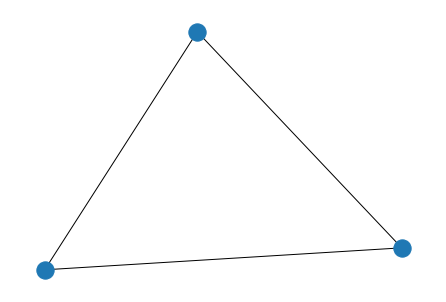

In [35]:
draw_graph(undir(G))

# Graph connectivity

In [36]:
def neighbors(G,u):
    return G[u]

def isedge(G,u,v):
    return v in neighbors(G,u)

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j): 
    if not j in G[i]:
        G[i].append(j)
        
def emptygraph(n):
    return [[] for i in range(n)]

In [37]:
def undirect(G):
    U = emptygraph(len(G))
    for u in vertices(G):
        for v in neighbors(G, u):
            addedge(U, u, v)
            addedge(U, v, u)
    return U

Given $i,j$ and a graph $G$: find out if $i$ has a path to $j$ (perhaps indirectly) in the graph

Here is a natural suggestion for a recursive algorithm:

$connected(i,j,G)$ is True if $i$ is a neighbor of $j$, and otherwise it is True if there is some neighbor $k$ of $i$ such that $k$ is connected to $j$. 

Let's code it up try to see what happens:

In [38]:
def connected(source, target, G):
    print(".",end="")
    if source == target:
        return True
    else:
        for k in neighbors(G, source):
            if connected(k, target, G):
                return True
        return False

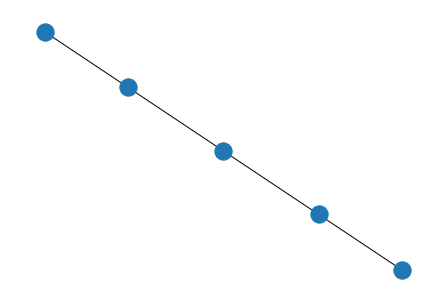

In [39]:
G = undir([[1],[2],[3],[4],[]])
draw_graph(G)

In [40]:
connected(0,1,G)

..

True

In [41]:
connected(0,2,G)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RecursionError: maximum recursion depth exceeded while calling a Python object

In [42]:
connected(0,3,G)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

RecursionError: maximum recursion depth exceeded while calling a Python object

The problem is that we are getting into an infinite loop! 
We can fix this by remembering which vertices we visited.

In [43]:
def connected(source, target, G, visited = []):
    if not (source in visited):
        visited.append(source)
    if source == target:
        return True
    else:
        #print('variables are now')
        #print(str(source) + ' ' + str(target) + ' ' + str(visited))
        for k in neighbors(G, source):
            if not (k in visited):
                visited.append(k)
                if connected(k, target, G, visited):
                    return True
        return False
    

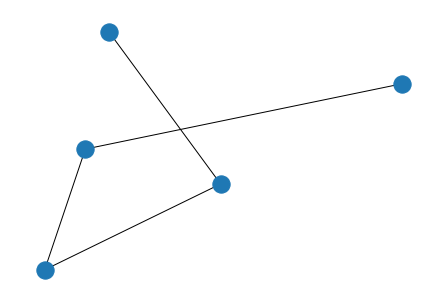

In [44]:
G = undir([[1],[2],[3],[4],[]])
draw_graph(G)

In [45]:
print(connected(0, 1, G, []))
#print('next one')
print(connected(0, 2, G, []))

True
True


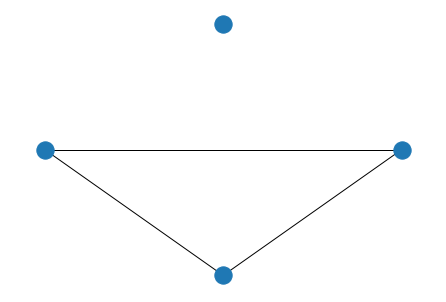

In [46]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [47]:
print (connected(0,1,G) , connected(0,3,G))

True False


In [49]:
def make_grid(n): # return a n by n grid with an isolated vertex
    G = emptygraph(n*n)
    for i in range(n):
        for j in range(n):
            v = i*n+j
            if i<n-1: addedge(G,v,(i+1)*n+j)
            if j<n-1: addedge(G,v,i*n+j+1)
    G = undir(G)
    return G
 
def grid_input(n):
    return (0,n*n,make_grid(n)+[[]])

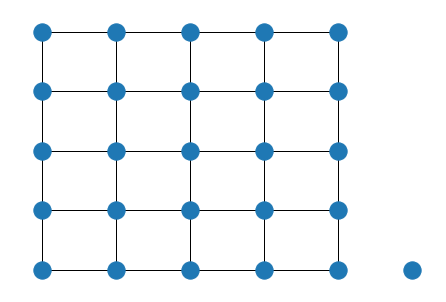

In [50]:
(s,t,G) = grid_input(5)
draw_graph(G, "grid_layout")

In [51]:
connected(0,1,G)

False

## Can speed up by changing how 'visited' works. Make it a length n list, where visited[u] is True if we ever visited vertex u and False otherwise

In [52]:
# DFS = Depth First Search
def search(u, G, visited):
    visited[u] = True
    for v in neighbors(G, u):
        if not visited[v]:
            search(v, G, visited)
    
def dfs(source, target, G):
    visited = [False]*len(G)
    search(source, G, visited)
    return visited[target]

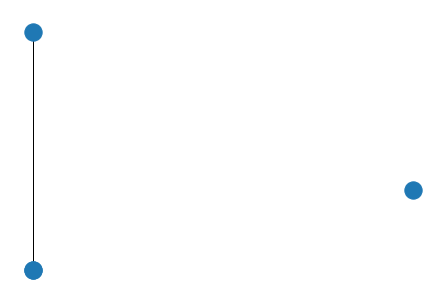

In [53]:
G = undir([[1],[2],[0],[]])
draw_graph(G)

In [54]:
print (dfs(0,1,G) , dfs(0,3,G))

True False


## Exercise: think about the order DFS visits vertices in the graph below

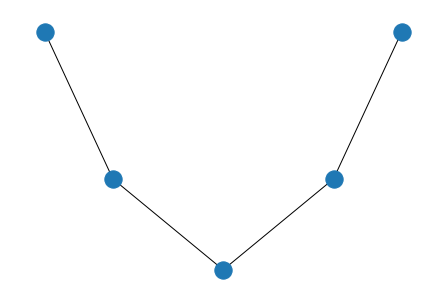

In [57]:
G = undir([[1,4],[2],[3],[2],[0]])
draw_graph(G)